In [1]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [8]:
corr_csv = pd.read_csv("t_v_2_corr.csv") 

In [9]:
corr_df = pd.DataFrame(corr_csv); corr_df

,c_X,c_Y
0,30,115
1,25,110
2,114,304
3,20,70
4,120,272
...,...,...
1730,96,288
1731,120,288
1732,120,288
1733,120,296


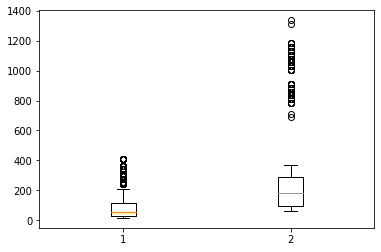

In [10]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(corr_df)
plt.show()

In [11]:
import numpy as np
Q1 = np.percentile(corr_df["c_Y"] , 25) 
Q3 = np.percentile(corr_df["c_Y"] , 75) 
IQR = Q3 - Q1 
outlier_step = 1.5 * IQR

outlier_step

286.5

In [12]:
c_Y = (corr_df < Q1 - outlier_step) | (corr_df > Q3 + outlier_step)
c_Y = c_Y.any(axis=1)
search_df = corr_df[c_Y]
print(search_df)

     c_X   c_Y
111  245   908
112  245   908
115  245   908
116  245   908
119  245   908
..   ...   ...
541  343  1158
544  343  1132
545  344  1132
549  343  1133
550  343  1133

[134 rows x 2 columns]


In [13]:
corr_df = corr_df.drop(search_df.index, axis=0)
print(corr_df)

      c_X  c_Y
0      30  115
1      25  110
2     114  304
3      20   70
4     120  272
...   ...  ...
1730   96  288
1731  120  288
1732  120  288
1733  120  296
1734  120  296

[1601 rows x 2 columns]


In [4]:
corr_ratio = corr_df["c_Y"] / corr_df["c_X"]

In [6]:
corr_ratio_df = pd.DataFrame(corr_ratio, columns=["c_ratio"]); corr_ratio_df

,c_ratio
0,3.833333
1,4.400000
2,3.500000
3,2.266667
4,2.266667
...,...
1737,3.000000
1738,2.400000
1739,2.400000
1740,2.466667


In [14]:
c_labels = ["0" for i in range(len(corr_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["c_labels"]); c_labels_df

,c_labels
0,0
1,0
2,0
3,0
4,0
...,...
1596,0
1597,0
1598,0
1599,0


In [15]:
# corr_data = corr_ratio_df.join(c_labels_df, how="right"); corr_data.head()
corr_data = corr_df.join(c_labels_df, how="right"); corr_data

,c_X,c_Y,c_labels
0,30.0,115.0,0
1,25.0,110.0,0
2,114.0,304.0,0
3,20.0,70.0,0
4,120.0,272.0,0
...,...,...,...
1596,25.0,77.0,0
1597,20.0,77.0,0
1598,120.0,272.0,0
1599,96.0,296.0,0


In [16]:
forw_csv = pd.read_csv("t_v_2_forw.csv") 

In [17]:
forw_df = pd.DataFrame(forw_csv); forw_df = forw_df.drop(forw_df.index[797])

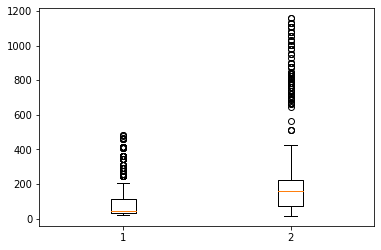

In [18]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


b = plt.boxplot(forw_df)
plt.show()

In [19]:
forw_df.columns = ["f_X", "f_Y"]

In [20]:
Q1_2 = np.percentile(forw_df["f_Y"] , 25) 
Q3_2 = np.percentile(forw_df["f_Y"] , 75) 
IQR_2 = Q3_2 - Q1_2 
outlier_step_2 = 1.5 * IQR_2

outlier_step_2

223.5

In [21]:
f_Y = (forw_df < Q1_2 - outlier_step_2) | (forw_df > Q3_2 + outlier_step_2)
f_Y = f_Y.any(axis=1)
searchf_df = forw_df[f_Y]
print(searchf_df)

     f_X   f_Y
173  294   785
174  245   761
178  245   809
179  294   785
180  294   809
..   ...   ...
507  411  1106
511  343  1158
512  412  1158
513  343  1107
514  344  1133

[108 rows x 2 columns]


In [22]:
forw_df = forw_df.drop(searchf_df.index, axis=0)
print(forw_df)

      f_X  f_Y
0      86  216
1     114  216
2      45   90
3      35   93
4     134  255
...   ...  ...
1675  111  230
1676  112  230
1677  135  238
1678  134  238
1679   40   80

[1571 rows x 2 columns]


In [23]:
forw_df[forw_df["f_X"]==0]

,f_X,f_Y


In [13]:
forw_ratio = forw_df["f_Y"] / forw_df["f_X"]

In [14]:
forw_ratio_df = pd.DataFrame(forw_ratio, columns=["f_ratio"]); forw_ratio_df.describe()

,f_ratio
count,1677.000000
mean,2.298496
std,0.646880
min,0.112676
25%,1.866667
50%,2.266667
75%,2.635294
max,8.000000


In [24]:
f_labels = ["1" for i in range(len(forw_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["f_labels"]); f_labels_df

,f_labels
0,1
1,1
2,1
3,1
4,1
...,...
1566,1
1567,1
1568,1
1569,1


In [25]:
# forw_data = forw_ratio_df.join(f_labels_df, how="right")
forw_data = forw_df.join(f_labels_df, how="right"); forw_data.head()

,f_X,f_Y,f_labels
0,86.0,216.0,1
1,114.0,216.0,1
2,45.0,90.0,1
3,35.0,93.0,1
4,134.0,255.0,1


In [26]:
corr_data.columns = ["x_data", "y_data", "labels"]
forw_data.columns = ["x_data", "y_data", "labels"]

In [27]:
total_data = pd.concat([corr_data, forw_data])

In [28]:
total_data.head()

,x_data,y_data,labels
0,30.0,115.0,0
1,25.0,110.0,0
2,114.0,304.0,0
3,20.0,70.0,0
4,120.0,272.0,0


In [29]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle

data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [30]:
data_shuffled = data_shuffled.dropna()

In [31]:
data_shuffled

,x_data,y_data,labels
0,25.0,110.0,0
1,35.0,103.0,0
2,25.0,85.0,0
3,142.0,368.0,1
5,114.0,240.0,1
...,...,...,...
3167,30.0,105.0,0
3168,35.0,103.0,0
3169,40.0,95.0,1
3170,25.0,100.0,0


In [32]:
pose_data = data_shuffled[["x_data", "y_data"]]

# encoder = LabelEncoder()
# encoder.fit(data_shuffled["labels"])
# data_shuffled["labels"] = encoder.transform(data_shuffled["labels"])

pose_label = data_shuffled["labels"]

In [33]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2)

# help( train_test_split )

In [34]:
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.8225255972696246


In [35]:
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.8737201365187713


In [36]:
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 회귀 정답률 = ", ac_score3)

엑스트라 트리 회귀 정답률 =  0.8754266211604096


In [37]:
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.8703071672354948


In [38]:
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.8515358361774744


In [39]:
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.8822525597269625


In [40]:
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)


경사 부스팅 정답률 =  0.8617747440273038


In [41]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

스태킹 정답률 =  0.8720136518771331


In [42]:
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.8344709897610921


In [43]:
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.856655290102389


In [44]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.8737201365187713


In [45]:
from sklearn.dummy import DummyClassifier
model11 = DummyClassifier(strategy="most_frequent")
model11.fit(train_data, train_label)
pre11 = model11.predict(test_data)
ac_score11 = metrics.accuracy_score(test_label, pre11)
print("더미 정답률 = ", ac_score11)

더미 정답률 =  0.49146757679180886


In [46]:
corr_test_csv = pd.read_csv('test2_corr.csv')

In [52]:
corr_test_df = pd.DataFrame(corr_test_csv)
corr_test_df

,c_X,c_Y
0,114,280
1,114,280
2,85,248
3,114,248
4,86,184
...,...,...
117,85,85
118,85,75
119,85,75
120,86,122


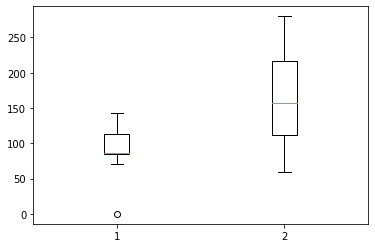

In [48]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(corr_test_df)
plt.show()

In [49]:
Q1_3 = np.percentile(corr_test_df["c_X"] , 25) 
Q3_3 = np.percentile(corr_test_df["c_X"] , 75) 
IQR_3 = Q3_3 - Q1_3 
outlier_step_3 = 1.5 * IQR_3

outlier_step_3

42.0

In [50]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [51]:
corr_test_df = corr_test_df.drop(searcht_df.index, axis=0)
print(corr_test_df)

     c_X  c_Y
61    99  154
62    85  128
63    85  133
64    85  133
65    85  133
66   100  144
67    86  144
68    72  118
69    71  107
70    71  123
71    72  129
72    71  112
73    86  113
74    86  112
75    86  118
76    85  139
77    85  150
78    85  144
79    85  133
80    71  123
81    85  123
82    72   64
84    86  123
85    86  128
86    71  123
87    71  112
88    85  133
89    86  138
90    71  144
91    71  133
92    71  101
93    71  101
94    71  101
95    85  106
96    71   96
97    71   96
98    85  106
99    86  112
100   86  138
101   86  133
102   85  117
103   85  112
104   86  112
105   86  112
106   85  107
107   85  102
108   86   86
109   86   91
110   85   86
111   85   75
112   86   80
113   85   91
114   85   96
115   86   95
116   86   85
117   85   85
118   85   75
119   85   75
120   86  122
121   86  122


In [53]:
corr_test_label = ["0" for i in range(len(corr_test_df))]
corr_test_label = pd.DataFrame(corr_test_label, columns=["labels"])

In [54]:
corr_test_data = corr_test_df.join(corr_test_label, how="right")

In [59]:
corr_test_data.columns = ["x_data", "y_data", "labels"]
corr_test_data

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,0
118,85,75,0
119,85,75,0
120,86,122,0


In [60]:
# from sklearn.preprocessing import LabelEncoder
# # LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(corr_test_data["labels"])
# corr_test_data["labels"] = encoder.transform(corr_test_data["labels"])
a = corr_test_data.values[: ,:2]

In [61]:
corr_pre = model.predict( a)

In [62]:
corr_score = metrics.accuracy_score( test_label[:122], corr_pre ) 
print("정답률 = " , corr_score)

정답률 =  0.5819672131147541


In [63]:
test_forw_csv = pd.read_csv('test2_forw.csv')

In [64]:
test_forw_df = pd.DataFrame(test_forw_csv)

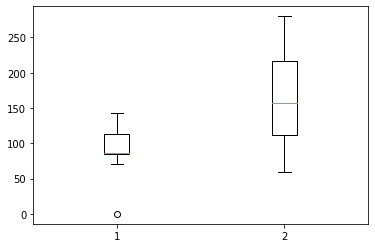

In [65]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


c = plt.boxplot(test_forw_df)
plt.show()

In [66]:
Q1_4 = np.percentile(test_forw_df , 25) 
Q3_4 = np.percentile(test_forw_df , 75) 
IQR_4 = Q3_4 - Q1_4 
outlier_step_4 = 1.5 * IQR_4

outlier_step_4

105.375

In [67]:
c_t_X = (corr_test_df < Q1_3 - outlier_step_3) | (corr_test_df > Q3_3 + outlier_step_3)
c_t_X = c_t_X.any(axis=1)
searcht_df = corr_test_df[c_t_X]
print(searcht_df)

    c_X  c_Y
0   114  280
1   114  280
2    85  248
3   114  248
4    86  184
..  ...  ...
57  114  208
58  114  256
59  114  256
60   99  159
83    0   59

[62 rows x 2 columns]


In [68]:
test_forw_label = ["1" for i in range(len(test_forw_df))]
test_forw_label = pd.DataFrame(test_forw_label, columns=["labels"])

In [69]:
test_forw_data = test_forw_df.join(test_forw_label, how="right")

In [71]:
test_forw_data.columns = ["x_data", "y_data", "labels"]
test_forw_data

,x_data,y_data,labels
0,114,280,1
1,114,280,1
2,85,248,1
3,114,248,1
4,86,184,1
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [72]:

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
# encoder = LabelEncoder()
# encoder.fit(test_forw_data["labels"])
# test_forw_data["labels"] = encoder.transform(test_forw_data["labels"])
b = test_forw_data.values[: ,:2]

In [73]:
forw_pre = model.predict(b)

In [74]:
forw_score = metrics.accuracy_score( test_label[:122], forw_pre ) 
print("정답률 = " , forw_score)

정답률 =  0.5819672131147541


In [75]:
total_test = pd.concat([corr_test_data,test_forw_data]); total_test

,x_data,y_data,labels
0,114,280,0
1,114,280,0
2,85,248,0
3,114,248,0
4,86,184,0
...,...,...,...
117,85,85,1
118,85,75,1
119,85,75,1
120,86,122,1


In [76]:
total_shuffled = total_test.sample(frac=1)  # row 전체 shuffle

total_shuffled = total_test.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset

In [77]:
total_shuffled.dropna()

,x_data,y_data,labels
0,71,112,1
1,142,240,0
2,85,96,1
3,86,184,0
4,114,208,1
...,...,...,...
239,85,128,0
240,85,192,0
241,114,248,1
242,71,101,1


In [78]:
# encoder = LabelEncoder()
# encoder.fit(total_shuffled["labels"])
# total_shuffled["labels"] = encoder.transform(total_shuffled["labels"])
c = total_shuffled.values[: ,:2]

In [79]:
total_pre = model.predict(c)

In [80]:
total_score = metrics.accuracy_score( test_label[:244], total_pre ) 
print("정답률 = " , total_score)

정답률 =  0.5491803278688525


In [82]:
total_pre1 = model10.predict(c)
total_score1 = metrics.accuracy_score(test_label[:244], total_pre1)
print("히스트그래디언트부스팅 정답률 = ", total_score1)

히스트그래디언트부스팅 정답률 =  0.5327868852459017


In [83]:
total_pre2 = model9.predict(c)
total_score2 = metrics.accuracy_score(test_label[:244], total_pre2)
print("보팅 하드 정답률 = ", total_score2)

보팅 하드 정답률 =  0.5491803278688525


In [84]:
total_pre3 = model4.predict(c)
total_score3 = metrics.accuracy_score(test_label[:244], total_pre3)
print("앙상블 랜덤포레스트 정답률 = ", total_score3)

앙상블 랜덤포레스트 정답률 =  0.5327868852459017


In [86]:
total_pre4 = model8.predict(c)
total_score4 = metrics.accuracy_score(test_label[:244], total_pre4)
print("스태킹 정답률 = ", total_score4)

스태킹 정답률 =  0.5327868852459017
